# LAB | API spotify

- In this Lab we will work with Spotify API and the library [Spotipy](https://spotipy.readthedocs.io/en/2.19.0/)

## Getting access to the API
- Create an Spotify account [here](https://developer.spotify.com/documentation/general/guides/app-settings/) and follow these steps to register an app. 
- After create the app you will be able to see it on your [dashboard](https://developer.spotify.com/dashboard/applications).
- Click in the app that you created to see your `client id` and `client secret`. 
- Save each one in the `client_id_spotify.txt` and `client_secret_spotify.txt` files.
- **Be careful: Do not upload your key to a public repository on github**
- After save you key in the `client_id_spotify.txt` and `client_secret_spotify.txt` you can use the code below to open the files:

In [1]:
import pandas as pd
import os
from dotenv import load_dotenv

In [2]:
load_dotenv('spotify_credentials.env')

True

In [3]:
spotify_client_id = os.getenv('SPOTIFY_CLIENT_ID')
spotify_client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')

In [4]:
# spotify_client_id = open('client_id_spotify.txt', 'r').read()
# spotify_client_secret = open('client_secret_spotify.txt', 'r').read()

## Initialize SpotiPy
- The firt step to use the API is getting the autentication from Spotify, to help us with that we will use the `spotipy` library.
- You may need install the library.
```python
!pip install spotipy
```
- After that you will need to run the following code:
```python
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=spotify_client_id,client_secret=spotify_client_secret))
```

In [5]:
# Your code here

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=spotify_client_id,client_secret=spotify_client_secret))

## Searching by artist
-  You can use `sp.search` get info.
- Save the search in a variable.
```python
sp.search(q='Lady Gaga', limit=50)
```

In [6]:
# Your code here

lady_gaga = sp.search(q='Lady Gaga', limit=50)

- After run the code above, explore the object returned.
- You can use `.keys()` to find the keys in your object.
- Explore the result untill you find the track names

In [7]:
# Your code here

lady_gaga.keys()

dict_keys(['tracks'])

In [8]:
lady_gaga['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [9]:
for track_name in range(50):
    print(lady_gaga['tracks']['items'][track_name]['name'])

Bad Romance
Telephone
Shallow
Poker Face
Paparazzi
Rain On Me (with Ariana Grande)
Alejandro
Rain On Me (with Ariana Grande)
Just Dance
Alejandro
Million Reasons
Born This Way
Always Remember Us This Way
Applause
Lady Gaga
Born This Way
Just Dance
Lady Gaga
Paparazzi
Video Phone (feat. Lady Gaga)
Stupid Love
Perform This Way (Parody of "Born This Way" by Lady Gaga)
Stupid Love
Lady Gaga Medley
Lady Gaga
Telephone
Paparrazzi - Lady Gaga
Lady Gaga
Applause
Don't Let Me Be Misunderstood (feat. Lady Gaga)
Shallow - Radio Edit
Lady Gaga
The Edge Of Glory
Lady Gaga
LoveGame
Lady Gaga
911 - Charli XCX & A. G. Cook Remix
Sarah Palin Vs Lady Gaga (feat. Nice Peter & Lisanova)
Judas
Do What You Want to My Body - Homage to Lady Gaga and R Kelly
Plastic Doll - Ashnikko Remix
Lady Gaga
Alejandro
Sarah Palin vs Lady Gaga
Always Remember Us This Way
Lady GaGa
911
Partynauseous (Lady Gaga Version) - Original
The Cure
Shallow (Originally Performed by Lady Gaga and Bradley Cooper)


## Searching multiple artists
- Using the following list and the command `.search` , find the results for each artist.
- Create a loop to go through the list.
```python
artists = ["Shawn Mendes", "Billie Eilish", "IZA", "Duda Beat"]
```

In [10]:
# Your code here

artists = ["Shawn Mendes", "Billie Eilish", "IZA", "Duda Beat"]
artists_info = {}

for artist in artists:
    artists_info[artist] = sp.search(q=artist, limit=50)

- Create a unique dataframe with all the results.
- You will need to enter in some keys from your results.
- The shape of your dataframe should be (200, 17)
- You can also add a new column with the name of the artist

In [27]:
# Your code here

df_artists = pd.DataFrame()

for singer in artists_info.keys():
    df = pd.DataFrame(artists_info[singer]['tracks']['items'])
    df['singer'] = singer
    df_artists = df_artists.append(df)

df_artists.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri,singer
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,184104,False,{'isrc': 'USUM72114707'},{'spotify': 'https://open.spotify.com/track/0z...,https://api.spotify.com/v1/tracks/0z8hI3OPS8AD...,0z8hI3OPS8ADPWtoCjjLl6,False,Summer of Love (Shawn Mendes & Tainy),86,None,1,track,spotify:track:0z8hI3OPS8ADPWtoCjjLl6,Shawn Mendes
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,206880,False,{'isrc': 'USUM71500658'},{'spotify': 'https://open.spotify.com/track/5t...,https://api.spotify.com/v1/tracks/5t4B1kAlCD13...,5t4B1kAlCD13YY9poph0Mg,False,Stitches,52,None,2,track,spotify:track:5t4B1kAlCD13YY9poph0Mg,Shawn Mendes
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,199440,False,{'isrc': 'USUM71702833'},{'spotify': 'https://open.spotify.com/track/7J...,https://api.spotify.com/v1/tracks/7JJmb5XwzOO8...,7JJmb5XwzOO8jgpou264Ml,False,There's Nothing Holdin' Me Back,81,None,1,track,spotify:track:7JJmb5XwzOO8jgpou264Ml,Shawn Mendes
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,178994,False,{'isrc': 'USUM72018810'},{'spotify': 'https://open.spotify.com/track/2Z...,https://api.spotify.com/v1/tracks/2Z8yfpFX0ZMa...,2Z8yfpFX0ZMavHkcIeHiO1,False,Monster (Shawn Mendes & Justin Bieber),78,None,1,track,spotify:track:2Z8yfpFX0ZMavHkcIeHiO1,Shawn Mendes
4,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR, B...",1,190800,False,{'isrc': 'USUM71907349'},{'spotify': 'https://open.spotify.com/track/3Y...,https://api.spotify.com/v1/tracks/3YKgFn9oaG6J...,3YKgFn9oaG6JV2z3wUDSUF,False,If I Can't Have You,14,None,3,track,spotify:track:3YKgFn9oaG6JV2z3wUDSUF,Shawn Mendes


In [28]:
df_artists.shape

(200, 18)

## Get audio features
- We will extract some measures that Spotify works, this is called audio features.
- You can check the documentation [here](https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject).

### Seach a music
- We will start seaching for a music
- Use the code below:
```python
music_dsn = sp.search(q='dont start now', limit=1)
```

In [29]:
# Your code here

music_dsn = sp.search(q='dont start now', limit=1)

### Find the `uri`
- Using the returned json you will need to find the music `uri` 
- Example of uri: `spotify:track:XXXxXxxXxxXxxXXXxxXx`

In [39]:
# Your code here

music_dsn.keys()

dict_keys(['tracks'])

In [40]:
music_dsn['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [55]:
print(music_dsn['tracks']['items'])

[{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6M2wZ9GZgrQXHCFfjv46we'}, 'href': 'https://api.spotify.com/v1/artists/6M2wZ9GZgrQXHCFfjv46we', 'id': '6M2wZ9GZgrQXHCFfjv46we', 'name': 'Dua Lipa', 'type': 'artist', 'uri': 'spotify:artist:6M2wZ9GZgrQXHCFfjv46we'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MN', 'MO', 'MR', 'MT', 'MU', 'MV', 'MW'

In [53]:
music_dsn['tracks']['items'][0]['uri']

'spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg'

- Use `sp.audio_features` to find the audio features, you will need to use the uri as a parameter.

In [56]:
# Your code here

audio_features = sp.audio_features('spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg')
audio_features

[{'danceability': 0.794,
  'energy': 0.793,
  'key': 11,
  'loudness': -4.521,
  'mode': 0,
  'speechiness': 0.0842,
  'acousticness': 0.0125,
  'instrumentalness': 0,
  'liveness': 0.0952,
  'valence': 0.677,
  'tempo': 123.941,
  'type': 'audio_features',
  'id': '6WrI0LAC5M1Rw2MnX2ZvEg',
  'uri': 'spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg',
  'track_href': 'https://api.spotify.com/v1/tracks/6WrI0LAC5M1Rw2MnX2ZvEg',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6WrI0LAC5M1Rw2MnX2ZvEg',
  'duration_ms': 183290,
  'time_signature': 4}]

# Bonus:
- Explore more the API!
- Try to find some info from a playlist.
- Try to get the audio feature from others songs and compare results.

In [70]:
zaz = sp.search('^zaz$', type='artist')
zaz.keys()

dict_keys(['artists'])

In [74]:
zaz['artists']['items'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/1mbgj8ERPs8lWi7t5cYrdy'},
 'followers': {'href': None, 'total': 1196857},
 'genres': ['chanson', 'french jazz', 'nouvelle chanson francaise'],
 'href': 'https://api.spotify.com/v1/artists/1mbgj8ERPs8lWi7t5cYrdy',
 'id': '1mbgj8ERPs8lWi7t5cYrdy',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb6d50f1c949fc7d389a2c09cf',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051746d50f1c949fc7d389a2c09cf',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1786d50f1c949fc7d389a2c09cf',
   'width': 160}],
 'name': 'Zaz',
 'popularity': 65,
 'type': 'artist',
 'uri': 'spotify:artist:1mbgj8ERPs8lWi7t5cYrdy'}

In [79]:
zaz['artists']['items'][0]['images'][0]['url']

'https://i.scdn.co/image/ab6761610000e5eb6d50f1c949fc7d389a2c09cf'

In [109]:
zaz_track = sp.search('zaz', type='track')
print(zaz_track['tracks']['items'][0])

{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/15ZjD8Gus20Miqw3fdOaXX'}, 'href': 'https://api.spotify.com/v1/artists/15ZjD8Gus20Miqw3fdOaXX', 'id': '15ZjD8Gus20Miqw3fdOaXX', 'name': 'Stunna Gambino', 'type': 'artist', 'uri': 'spotify:artist:15ZjD8Gus20Miqw3fdOaXX'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MN', 'MO', 'MR',

In [111]:
audio_features_zaz = sp.audio_features('spotify:track:67IBUDBd2JqElQWKX6sVTD')
audio_features_zaz

[{'danceability': 0.795,
  'energy': 0.66,
  'key': 11,
  'loudness': -7.605,
  'mode': 0,
  'speechiness': 0.121,
  'acousticness': 0.219,
  'instrumentalness': 6.04e-06,
  'liveness': 0.174,
  'valence': 0.443,
  'tempo': 132.959,
  'type': 'audio_features',
  'id': '67IBUDBd2JqElQWKX6sVTD',
  'uri': 'spotify:track:67IBUDBd2JqElQWKX6sVTD',
  'track_href': 'https://api.spotify.com/v1/tracks/67IBUDBd2JqElQWKX6sVTD',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/67IBUDBd2JqElQWKX6sVTD',
  'duration_ms': 155428,
  'time_signature': 4}]

In [153]:
df_zaz = pd.DataFrame(audio_features_zaz).T.reset_index()
df_zaz

,index,0
0,danceability,0.795
1,energy,0.66
2,key,11
3,loudness,-7.605
4,mode,0
5,speechiness,0.121
6,acousticness,0.219
7,instrumentalness,0.000006
8,liveness,0.174
9,valence,0.443


In [154]:
df_zaz.columns = ['audio_features', 'Zaz - Zaz']
df_zaz

,audio_features,Zaz - Zaz
0,danceability,0.795
1,energy,0.66
2,key,11
3,loudness,-7.605
4,mode,0
5,speechiness,0.121
6,acousticness,0.219
7,instrumentalness,0.000006
8,liveness,0.174
9,valence,0.443


In [80]:
import requests
from PIL import Image

In [81]:
response = requests.get(zaz['artists']['items'][0]['images'][0]['url'], stream=True)

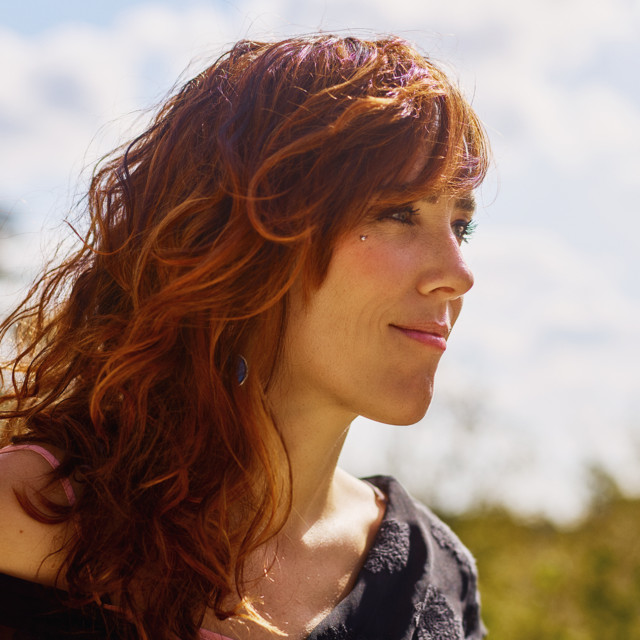

In [82]:
Image.open(response.raw)

In [83]:
revolverheld = sp.search('Revolverheld', type='artist')
revolverheld.keys()

dict_keys(['artists'])

In [84]:
revolverheld

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Revolverheld&type=artist&offset=0&limit=10',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5FYfIAuN8mV5KgVtugwfc0'},
    'followers': {'href': None, 'total': 423355},
    'genres': ['german pop', 'german pop rock', 'german rock'],
    'href': 'https://api.spotify.com/v1/artists/5FYfIAuN8mV5KgVtugwfc0',
    'id': '5FYfIAuN8mV5KgVtugwfc0',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5eba49cb9c892452f72b1d5558b',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab67616100005174a49cb9c892452f72b1d5558b',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f178a49cb9c892452f72b1d5558b',
      'width': 160}],
    'name': 'Revolverheld',
    'popularity': 57,
    'type': 'artist',
    'uri': 'spotify:artist:5FYfIAuN8mV5KgVtugwfc0'}],
  'limit': 10,
  'next': None,
  'offset': 0,
  'previous': Non

In [94]:
rh = sp.search('Immer in Bewegung', type='album')
print(rh['albums']['items'][0])

{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5FYfIAuN8mV5KgVtugwfc0'}, 'href': 'https://api.spotify.com/v1/artists/5FYfIAuN8mV5KgVtugwfc0', 'id': '5FYfIAuN8mV5KgVtugwfc0', 'name': 'Revolverheld', 'type': 'artist', 'uri': 'spotify:artist:5FYfIAuN8mV5KgVtugwfc0'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MN', 'MO', 'MR', 'MT', 'MU', 

In [92]:
rh_album_name = rh['albums']['items'][0]['name']
rh_album_name

'Immer in Bewegung'

In [93]:
rh_album_release_date = rh['albums']['items'][0]['release_date']
rh_album_release_date

'2013-09-20'

In [105]:
rh_track = sp.search('Lass uns gehen', type='track')
print(rh_track['tracks']['items'][0])

{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5FYfIAuN8mV5KgVtugwfc0'}, 'href': 'https://api.spotify.com/v1/artists/5FYfIAuN8mV5KgVtugwfc0', 'id': '5FYfIAuN8mV5KgVtugwfc0', 'name': 'Revolverheld', 'type': 'artist', 'uri': 'spotify:artist:5FYfIAuN8mV5KgVtugwfc0'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MN', 'MO', 'MR', 'M

In [115]:
audio_features_rh = sp.audio_features('spotify:track:0fHsDAxHoljPezzp8A84Kz')
audio_features_rh

[{'danceability': 0.606,
  'energy': 0.841,
  'key': 10,
  'loudness': -6.907,
  'mode': 1,
  'speechiness': 0.033,
  'acousticness': 0.0766,
  'instrumentalness': 0,
  'liveness': 0.211,
  'valence': 0.321,
  'tempo': 122.003,
  'type': 'audio_features',
  'id': '0fHsDAxHoljPezzp8A84Kz',
  'uri': 'spotify:track:0fHsDAxHoljPezzp8A84Kz',
  'track_href': 'https://api.spotify.com/v1/tracks/0fHsDAxHoljPezzp8A84Kz',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0fHsDAxHoljPezzp8A84Kz',
  'duration_ms': 246667,
  'time_signature': 4}]

In [151]:
df_rh = pd.DataFrame(audio_features_rh).T.reset_index()
df_rh

,index,0
0,danceability,0.606
1,energy,0.841
2,key,10
3,loudness,-6.907
4,mode,1
5,speechiness,0.033
6,acousticness,0.0766
7,instrumentalness,0
8,liveness,0.211
9,valence,0.321


In [152]:
# df_rh.rename(columns = {'0':'Weight in kgs'}, inplace = True)
df_rh.columns = ['audio_features', 'Revolverheld – Immer in Bewegung']
df_rh

,audio_features,Revolverheld – Immer in Bewegung
0,danceability,0.606
1,energy,0.841
2,key,10
3,loudness,-6.907
4,mode,1
5,speechiness,0.033
6,acousticness,0.0766
7,instrumentalness,0
8,liveness,0.211
9,valence,0.321


In [156]:
zaz_vs_rh = pd.merge(df_zaz, df_rh, on='audio_features')
zaz_vs_rh

,audio_features,Zaz - Zaz,Revolverheld – Immer in Bewegung
0,danceability,0.795,0.606
1,energy,0.66,0.841
2,key,11,10
3,loudness,-7.605,-6.907
4,mode,0,1
5,speechiness,0.121,0.033
6,acousticness,0.219,0.0766
7,instrumentalness,0.000006,0
8,liveness,0.174,0.211
9,valence,0.443,0.321
